In [684]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [685]:
df = pd.read_csv('/content/titanic-passengers.csv')

In [686]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [687]:
df.duplicated().sum()

np.int64(0)

In [688]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [689]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [690]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [691]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
Fare,0
Embarked,0
FamilySize,0


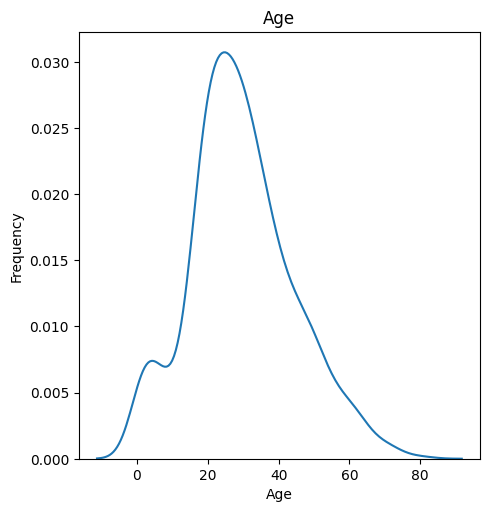

In [692]:
plt.figure(figsize=(5,5))
plt.subplot(1,1,1)
sns.kdeplot(df['Age'])
plt.tight_layout()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age')
plt.show()

In [693]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df['Age'] < (Q1 - 1.5 * IQR)) |(df['Age'] > (Q3 + 1.5 * IQR)))
outliers.sum()

np.int64(11)

In [694]:
# right skewed and has outliers -> median to fill nulls
df['Age'].fillna(df['Age'].median(), inplace=True)

In [695]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Survived'] = df['Survived'].map({'Yes': 1, 'No': 0})

In [696]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [697]:
df['Embarked_Q'] = df['Embarked_Q'].astype(int)
df['Embarked_S'] = df['Embarked_S'].astype(int)

In [698]:
df

,Survived,Pclass,Sex,Age,Fare,FamilySize,Embarked_Q,Embarked_S
0,0,2,0,28.0,13.0000,1,0,1
1,0,3,0,25.0,7.6500,1,0,1
2,0,3,0,20.0,7.8542,1,0,1
3,0,3,1,29.0,21.0750,5,0,1
4,0,1,0,31.0,52.0000,2,0,1
...,...,...,...,...,...,...,...,...
886,1,2,1,14.0,30.0708,2,0,0
887,0,3,0,22.0,7.2292,1,0,0
888,0,3,1,30.0,8.6625,1,0,1
889,0,3,0,28.0,7.8958,1,0,1


In [699]:
out = ['Age', 'Fare']
for i in out:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1
  outliers = ((df[i] < (Q1 - 1.5 * IQR)) |(df[i] > (Q3 + 1.5 * IQR)))
  print(outliers.sum())

66
116


In [700]:
df['Age'].describe()

,Age
count,891.000000
mean,29.361582
std,13.019697
min,0.420000
25%,22.000000
50%,28.000000
75%,35.000000
max,80.000000


In [701]:
df['Fare'].describe()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


In [702]:
# no need to remove them or handle them as they are actualy real-world values not errors

In [703]:
df

,Survived,Pclass,Sex,Age,Fare,FamilySize,Embarked_Q,Embarked_S
0,0,2,0,28.0,13.0000,1,0,1
1,0,3,0,25.0,7.6500,1,0,1
2,0,3,0,20.0,7.8542,1,0,1
3,0,3,1,29.0,21.0750,5,0,1
4,0,1,0,31.0,52.0000,2,0,1
...,...,...,...,...,...,...,...,...
886,1,2,1,14.0,30.0708,2,0,0
887,0,3,0,22.0,7.2292,1,0,0
888,0,3,1,30.0,8.6625,1,0,1
889,0,3,0,28.0,7.8958,1,0,1


In [704]:
x = df.drop(['Survived'], axis=1)
y = df['Survived']

In [705]:
y.value_counts()

,count
Survived,
0,549
1,342


In [706]:
# standard
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [707]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [708]:
# smoting
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train, y_train = smote.fit_resample(x_train, y_train)

In [709]:
# dt
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

In [710]:
dt.score(x_test, y_test)

0.7649253731343284

In [711]:
# confustion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[132,  33],
       [ 30,  73]])

In [712]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81       165
           1       0.69      0.71      0.70       103

    accuracy                           0.76       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.77      0.76      0.77       268



In [713]:
# rf
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

In [714]:
rf.score(x_test, y_test)

0.8208955223880597

In [715]:
confusion_matrix(y_test, y_pred)

array([[142,  23],
       [ 25,  78]])

In [716]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       165
           1       0.77      0.76      0.76       103

    accuracy                           0.82       268
   macro avg       0.81      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268



In [717]:
# xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

In [718]:
xgb.score(x_test, y_test)

0.7761194029850746

In [719]:
confusion_matrix(y_test, y_pred)

array([[133,  32],
       [ 28,  75]])

In [720]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       165
           1       0.70      0.73      0.71       103

    accuracy                           0.78       268
   macro avg       0.76      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268

